# SVM - Support Vector Machine

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
file_path = "../../files/"

## Base `credit_data`

In [3]:
base = pd.read_csv(file_path + 'credit_data.csv')
base.loc[base.age < 0, 'age'] = 40.92
               
previsores = base.iloc[:, 1:4].values
classe = base.iloc[:, 4].values

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer = imputer.fit(previsores[:, 1:4])
previsores[:, 1:4] = imputer.transform(previsores[:, 1:4])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
previsores = scaler.fit_transform(previsores)

from sklearn.model_selection import train_test_split
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(
    previsores, classe, test_size=0.25, random_state=0)

### Classificador SVM

In [4]:
from sklearn.svm import SVC
classificador = SVC(kernel = 'rbf', random_state = 1, C = 2.0, gamma='auto')
classificador.fit(previsores_treinamento, classe_treinamento)
previsoes = classificador.predict(previsores_teste)

### Avaliando

In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
precisao = accuracy_score(classe_teste, previsoes)
matriz = confusion_matrix(classe_teste, previsoes)
print("Accuracy\n", precisao, "\n")
print("Matrix de Confusao\n",matriz, "\n")
print("Matrix de Confusao Porcentagem\n",matriz/matriz.sum(), "\n")
print(classification_report(classe_teste,previsoes))

Accuracy
 0.988 

Matrix de Confusao
 [[434   2]
 [  4  60]] 

Matrix de Confusao Porcentagem
 [[0.868 0.004]
 [0.008 0.12 ]] 

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       436
           1       0.97      0.94      0.95        64

    accuracy                           0.99       500
   macro avg       0.98      0.97      0.97       500
weighted avg       0.99      0.99      0.99       500



## Base `census`

In [11]:
base = pd.read_csv(file_path + 'census.csv')

previsores = base.iloc[:, 0:14].values
classe = base.iloc[:, 14].values
                
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

column_tranformer = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(), [1, 3, 5, 6, 7, 8, 9, 13])],
    remainder='passthrough')
previsores = column_tranformer.fit_transform(previsores).toarray()

labelencorder_classe = LabelEncoder()
classe = labelencorder_classe.fit_transform(classe)


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
previsores = scaler.fit_transform(previsores)

from sklearn.model_selection import train_test_split
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(
    previsores, classe, test_size=0.15, random_state=0)

### Classificador SVM

In [13]:
from sklearn.svm import SVC
classificador = SVC(kernel = 'linear', random_state = 1)
classificador.fit(previsores_treinamento, classe_treinamento)
previsoes = classificador.predict(previsores_teste)

### Avaliando

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
precisao = accuracy_score(classe_teste, previsoes)
matriz = confusion_matrix(classe_teste, previsoes)
print("Accuracy\n", precisao, "\n")
print("Matrix de Confusao\n",matriz, "\n")
print("Matrix de Confusao Porcentagem\n",matriz/matriz.sum(), "\n")
print(classification_report(classe_teste,previsoes))

Accuracy
 0.8507676560900717 

Matrix de Confusao
 [[3459  234]
 [ 495  697]] 

Matrix de Confusao Porcentagem
 [[0.70808598 0.04790174]
 [0.1013306  0.14268168]] 

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      3693
           1       0.75      0.58      0.66      1192

    accuracy                           0.85      4885
   macro avg       0.81      0.76      0.78      4885
weighted avg       0.84      0.85      0.84      4885



## Kernel English ML-AZ (90%)

In [17]:
# Importing the dataset
dataset = pd.read_csv(file_path + 'Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [18]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
precisao = accuracy_score(y_test, y_pred)
matriz = confusion_matrix(y_test, y_pred)
print("Accuracy\n", precisao, "\n")
print("Matrix de Confusao\n", matriz, "\n")
print("Matrix de Confusao Porcentagem\n", matriz/matriz.sum(), "\n")
print(classification_report(y_test, y_pred))

Accuracy
 0.9 

Matrix de Confusao
 [[66  2]
 [ 8 24]] 

Matrix de Confusao Porcentagem
 [[0.66 0.02]
 [0.08 0.24]] 

              precision    recall  f1-score   support

           0       0.89      0.97      0.93        68
           1       0.92      0.75      0.83        32

    accuracy                           0.90       100
   macro avg       0.91      0.86      0.88       100
weighted avg       0.90      0.90      0.90       100



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


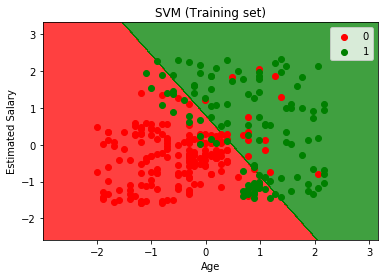

In [20]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


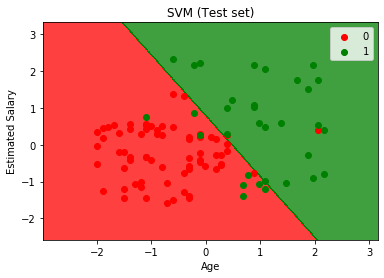

In [21]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## SVM KERNEL ENGLISH ML-AZ (93%)

In [22]:
# Importing the dataset
dataset = pd.read_csv(file_path + 'Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [23]:
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
precisao = accuracy_score(y_test, y_pred)
matriz = confusion_matrix(y_test, y_pred)
print("Accuracy\n", precisao, "\n")
print("Matrix de Confusao\n", matriz, "\n")
print("Matrix de Confusao Porcentagem\n", matriz/matriz.sum(), "\n")
print(classification_report(y_test, y_pred))

Accuracy
 0.93 

Matrix de Confusao
 [[64  4]
 [ 3 29]] 

Matrix de Confusao Porcentagem
 [[0.64 0.04]
 [0.03 0.29]] 

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


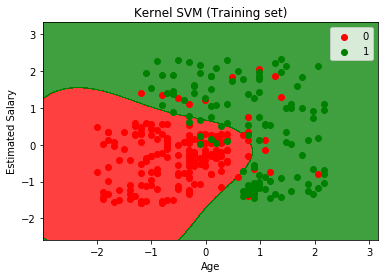

In [25]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


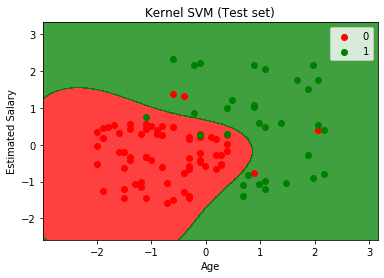

In [26]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Questions SVM English ML-AZ

### SVM Intuition

Is SVM a linear model?

Yes, SVM is a linear model. You will see that easily in the practical sections of this course, when visualizing
the results on the graph (you will notice that the prediction boundary is a straight line). However we can
make the SVM a non linear model, by adding a kernel, which you will see in the next section.

Why does we see the support vectors as vectors not as points?

The vectors are points in 2-D space (as in this example), but in real-world problems we have data-sets
of higher dimensions. In an n-dimensional space, vectors make more sense and it is easier to do vector
arithmetic and matrix manipulations rather than considering them as points. This is why we generalize the
data-points to vectors. This also enables us to think of them in an N-dimensional space.

### SVM in Python

What does the fit method do here?

It will simply train the SVM model on X_train and y_train. More precisely, the fit method will collect the
data in X_train and y_train, and from that it will compute the support vectors. Once the support vectors
are computed, your classifier model is fully ready to make new predictions with the predict method (because
it only requires the support vectors to classify new data).

## Questions SVM KERNEL ML-AZ

###  Kernel SVM Intuition

Why exactly are we converting the high dimensional space in 3D back to 2D?

That’s because we need to go back to our original space that contains our independent variables. If you
stayed in the 3d space you would loose the information of your independent variables because in this 3d
space there are not your original independent variables but the projections of them. So you want to go back
to the original 2d space by projecting back the points.

When we apply the transformation f = x − 5 the points just move left on the same 1D axis.
But when we apply the transformation f = (x − 5) 2 , why do the points move to a U curve in
2D? Should the points not stay on the same axis in 1D?

Two different kinds of transformation are involved here, the first one is a transformation in one dimension
for the coordinate x, and should be seen this way:

````
x 0 = x − 5
````

With this transformation (called translation), the points are moved 5 units to the left. Then, the mapping
transformation occurs, which is the mapping transformation involved in Kernel SVM. But this one should
be seen this way:

````
y = (x 0 − 5) 2
````

where y is the new coordinate you create with this mapping in higher dimension.

Which Kernel to choose?

A good way to decide which kernel is the most appropriate is to make several models with different kernels,
then evaluate each of their performance, and finally compare the results. Then you choose the kernel with
the best results. Be careful to evaluate the model performance on new observations (preferably with K-Fold
Cross Validation that we will see in Part 10) and to consider different metrics (Accuracy, F1 Score, etc.).

### Kernel SVM in Python

What does the fit method do here?

It will simply train the SVM model on X_train and y_train with a non linear Kernel. More precisely, the fit
method will collect the data in X_train and y_train, and from that it will do all the successive operations
you saw in the Intuition Lecture: first, a mapping in a higher dimensional space where the data is linearly
separable, then compute the support vectors in this higher dimensional space, and eventually a projection
back into 2D.

How to predict the outcome of a single new observation?

You need to input the data of your single observation in an array, scale it with our sc scaler object (we need
to scale here because our model was trained on scaled data), and use the predict method like this:

````
single_prediction = classifier.predict(sc.transform(np.array([[30, 80000]])))
````